In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.dummy import DummyClassifier

In [5]:
hotel_df=pd.read_csv('hotel_bookings.csv')

# Information about Dataset

1. hotel :(H1 = Resort Hotel or H2 = City Hotel).

2. is_canceled Value: showing if the booking had been cancelled (1) or not (0).

3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

4. arrival_date_year: Year of arrival date.

5. arrival_date_month: The months in which guests are coming.

6. arrival_date_week_number: Week number of year for arrival date.

7. arrival_date_day_of_month: Which day of the months guest is arriving.

8. stays_in_weekend_nights: Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

9. stays_in_week_nights: Number of weekdays stay at night (Monday to Friday) in the hotel.

10. adults: Number of adults.

11. children: Number of children.

12. babies: Number of babies.

13. meal: Type of meal booked.

14. country: Country of origin.

15. market_segment: Through which channel hotels were booked.

16. distribution_channel: Booking distribution channel.

17. is_repeated_guest: The values indicating if the booking name was from a repeated guest (1) or not (0).

18. previous_cancellations: Show if the repeated guest has cancelled the booking before.
    
19. previous_bookings_not_canceled: Show if the repeated guest has not cancelled the booking before.

20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. assigned_room_type: Code for the type of room assigned to the booking. Code is presented instead of designation for anonymity reasons.

22. booking_changes: How many times did booking changes happen.

23. deposit_type: Indication on if the customer deposited something to confirm the booking.

24. agent: If the booking happens through agents or not.

25. company: If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.

26. days_in_waiting_list: Number of days the booking was on the waiting list before the confirmation to the customer.
    
27. customer_type: Booking type like Transient – Transient-Party – Contract – Group.

28. adr: Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.

29. required_car_parking_spaces: How many parking areas are necessary for the customers.

30. total_of_special_requests: Total unique requests from consumers.

31. reservation_status: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out

32. reservation_status_date: The last status date.

In [6]:
hotel_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [7]:
#Initial Statistical Description
hotel_df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

# General information about the features in train dataset

In [8]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are 119390 rows for 32 features in our data. We see in the data, that all the datatypes belong to a numeric class i.e. integer, float and object.

In [9]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
## Percentage of Null values
null_df = hotel_df.isnull().sum().sort_values(ascending=False).to_frame()
null_df.columns= ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(hotel_df)*100,2)
null_df[null_df["No of Null values"] > 0]

No of Null values  % of Null values
company              112593             94.31
agent                 16340             13.69
country                 488              0.41
children                  4              0.00

There are more than 90% of null values present in the company feature and approx. 14% of the null values in the agent feature. The other features country and children have less amount of missing data 488 and 4 values to be exact respectively. We will sort the agent, country and children features by filling the null values whereas we will drop the company feature.

In [11]:
hotel_df.drop(['company'], axis=1, inplace=True)
hotel_df.head(2)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   

   booking_changes  deposit_type agent days_in_waiting_list customer_type  \
0                3    No Deposit   NaN                    0     Transient   
1                4    No Deposit   NaN                    0     Transient   

   adr  required_car_parking_spaces  total_of_special_requests  \
0  0.0                            0                          0   
1  0.0                            0                          0   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  

[2 rows x 31 columns]

We dropped the company column.

In [12]:
hotel_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


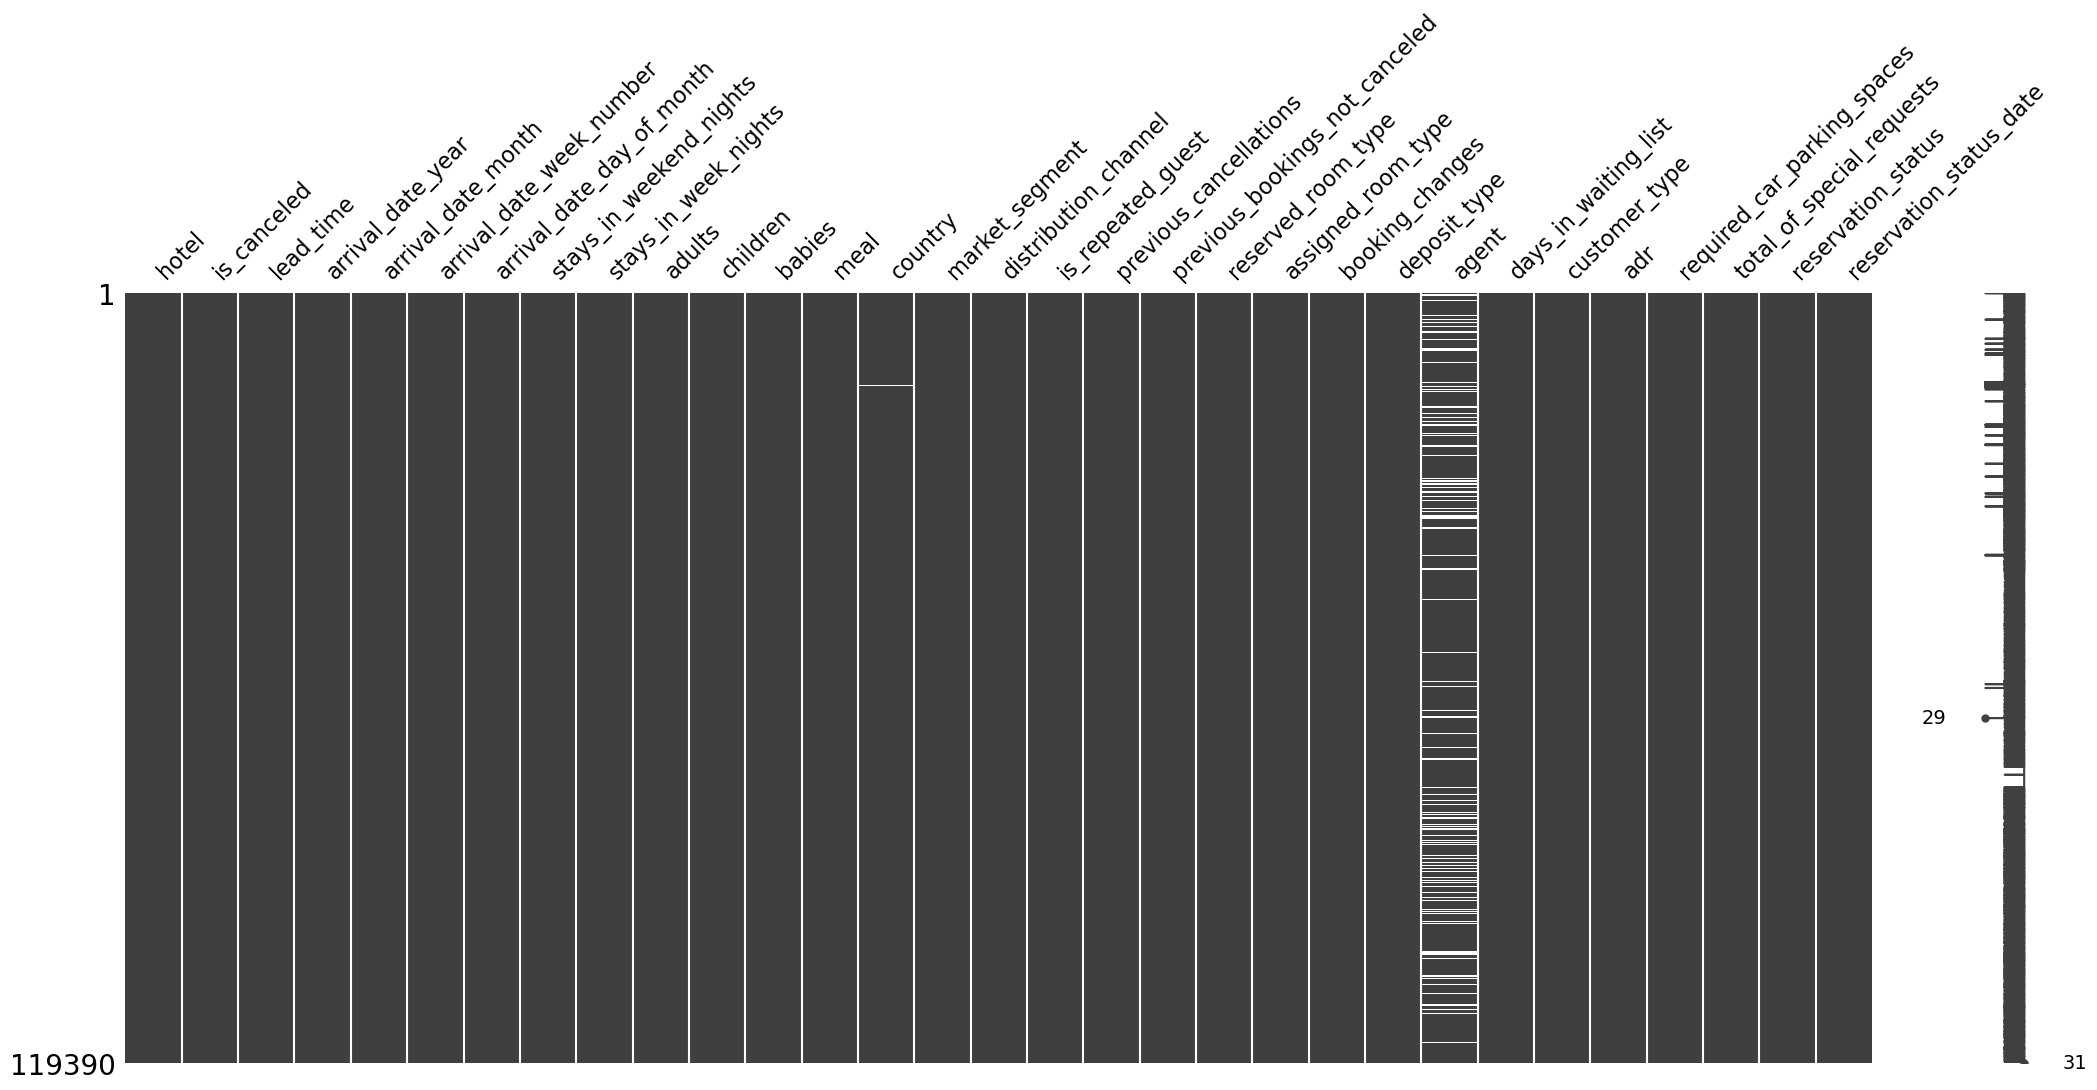

In [13]:
##Visualize missing values (NaN) values using Missingno Library
import missingno as msno
msno.matrix(hotel_df);

# Check Duplicate

In [14]:
### Checkin for the duplicate values in the dataset
hotel_df.duplicated().sum()
hotel_df.duplicated().any()

True

In [15]:
#Drop Duplicate entries 
hotel_df.drop_duplicates(inplace= False)# will keep first row and others consider as duplicate

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
0                          0       2  ...                3    No Deposit   
1                          0       2  ...                4    No Deposit   
2                          1       1  ...                0    No Deposit   
3                          1       1  ...                0    No Deposit   
4                          2       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119385                     5       2  ...                0    No Deposit   
119386                     5       3  ...                0    No Deposit   
119387                     5       2  ...                0    No Deposit   
119388                     5       2  ...                0    No Deposit   
119389                     7       2  ...                0    No Deposit   

        agent days_in_waiting_list customer_type     adr  \
0         NaN                    0     Transient    0.00   
1         NaN                    0     Transient    0.00   
2         NaN                    0     Transient   75.00   
3       304.0                    0     Transient   75.00   
4       240.0                    0     Transient   98.00   
...       ...                  ...           ...     ...   
119385  394.0                    0     Transient   96.14   
119386    9.0                    0     Transient  225.43   
119387    9.0                    0     Transient  157.71   
119388   89.0                    0     Transient  104.40   
119389    9.0                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0   

In [16]:
hotel_df['children'].mean()

#To replace the missing values in Children column, trying to find mean, median and mode to check which is better.
#mean value is a floating point value but children can never be float
#So not using the mean value to replace missing values.


0.10388990333874994

In [17]:
hotel_df['children'].median()

0.0

In [18]:
hotel_df['children'].mode()

#Mode and median are same which is 0. To check with which to replace with, using one more method below

0    0.0
Name: children, dtype: float64

In [19]:
hotel_df['children'].value_counts()

#value_counts method returns the most frequent value in that column and the count of it
#respectively for all values in that column. 
#For children 0 is the most frequest value which is mode and median.
#So, replacing the missing values of children with 0

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [20]:
hotel_df['children'] = hotel_df['children'].fillna(0)


In [21]:
hotel_df['country'].value_counts()

#Imputing the missing values in column country with most frequest country.

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [22]:
hotel_df['country'] = hotel_df['country'].fillna(hotel_df['country'].value_counts().index[0])


In [23]:
hotel_df =hotel_df.drop(columns = ['agent'])

#In the agent column the most frequent value is very less but the actual missing values are much high.
#Imputing with mode will not be optimal and as most of the values are NaN, we can impute 0 or drop the agent column

In [24]:
hotel_df.isna().sum()

#Below is the missing values after handling all the columns

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [25]:
hotel_df.describe()

#Checking for outliers
#Outlier is  value that lies in an abnormal distance from other values.
#If we observe the mean and min or max values of all columns, adr column has a negative value, and the minimum value is 
#extremely far from mean value, which means the minimum value is an outlier.


is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119390.000000  119390.000000      119390.000000   
mean        0.103886       0.007949           0.031912   
std         0.398555       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    119390.000000         119390.000000  119390.000000   
mean          0.221124              2.321149     101.831122   
std           0.652306             17.594721      50.535790   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      69.290000   
50%           0.000000              0.000000      94.575000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

<Axes: xlabel='adr'>

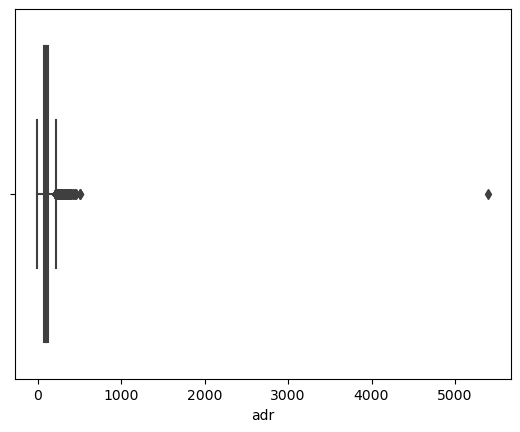

In [26]:
sns.boxplot(x=hotel_df['adr'])

#We can visualize outliers using boxplot


In [27]:
hotel_df = hotel_df.drop(hotel_df[hotel_df.adr < 0].index)
hotel_df[hotel_df['adr'] < 0]
#Dropping the negative value row and printing to check if there are any more negative values
#We get 0 rows that means no more negative values.

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 30 columns]

In [28]:
hotel_df = hotel_df.drop(hotel_df[hotel_df.adr > 5000].index)
hotel_df[hotel_df['adr']> 5000]

#If we observe the boxplot above, there is only one value above 5000 which is at extreme compared to others
#Dropping the row with 5000

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 30 columns]

In [29]:
#hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] == 0].shape

#There are some rows which has adults,babies,children equal to 0.
#No booking cab be made with adult/children 0. So, check if there are any rows of the above kind.
#There are 180 rows of suck kind, Our algorithm will not learn anything from these rows.
#Dropping all the rows which satisfy above conditiondf1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)


In [30]:
#hotel_df.drop(hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] == 0].index, inplace = False)


# Dependent Variable or Feature

In [31]:
hotel_df["is_canceled"].value_counts()

is_canceled
0    75165
1    44223
Name: count, dtype: int64

<Axes: xlabel='is_canceled'>

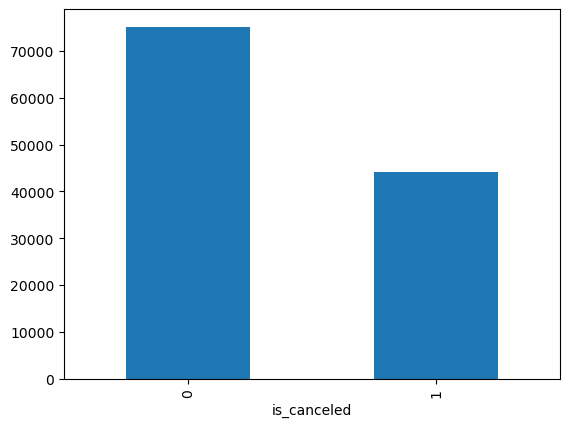

In [32]:
hotel_df['is_canceled'].value_counts().plot(kind = 'bar')

#If we look at the bar plot of target variable there is approximately 2:1 ratio between majority and minority class.

# Check dependent variable is balanced or not

In [37]:
round(hotel_df["is_canceled"].value_counts()[1]/(hotel_df["is_canceled"].value_counts()[0]+hotel_df["is_canceled"].value_counts()[1])*100,2)

37.04

This problem is a binary classification problem of classes 0 or 1 denoting customers satisfaction, The class 1 has only 37.04% total values. Hence, our dataset is an imbalance datase.


# Independent Variables or Features

In [38]:
hotel_df.columns[:-1]

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

# Exploratory Data Analysis and Visualization

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(hotel_df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

ValueError: could not convert string to float: 'Resort Hotel'

<Figure size 2000x1000 with 0 Axes>

1. Stays in weekend nights and stays in week nights are correlated. 

In [40]:
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['babies'] + hotel_df['children']
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

#Adding two new columns
#Combining adults, babies,children into total_people 
#Similarly added total_stay column

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

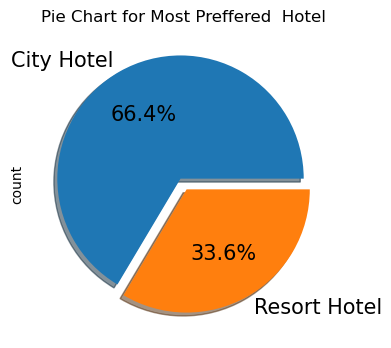

In [41]:
#Data Visualization

hotel_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%',shadow=True,  figsize=(6,4),fontsize=15)   
plt.title('Pie Chart for Most Preffered  Hotel')

#Pie chart to visualize the ratio between Resort hotel and City hotel 

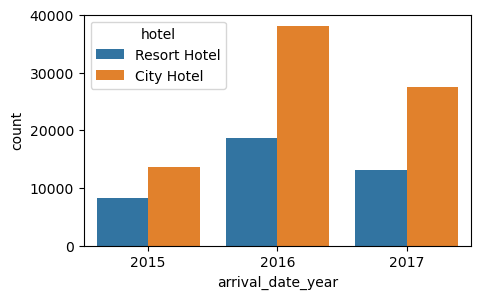

In [42]:
plt.subplots(figsize=(5, 3))
sns.countplot(x='arrival_date_year', hue='hotel',  data=hotel_df);

#The percetage of booking each year?
#More than double bookings were made in the year 2016 than previous year 

Text(0, 0.5, 'Number of bookings')

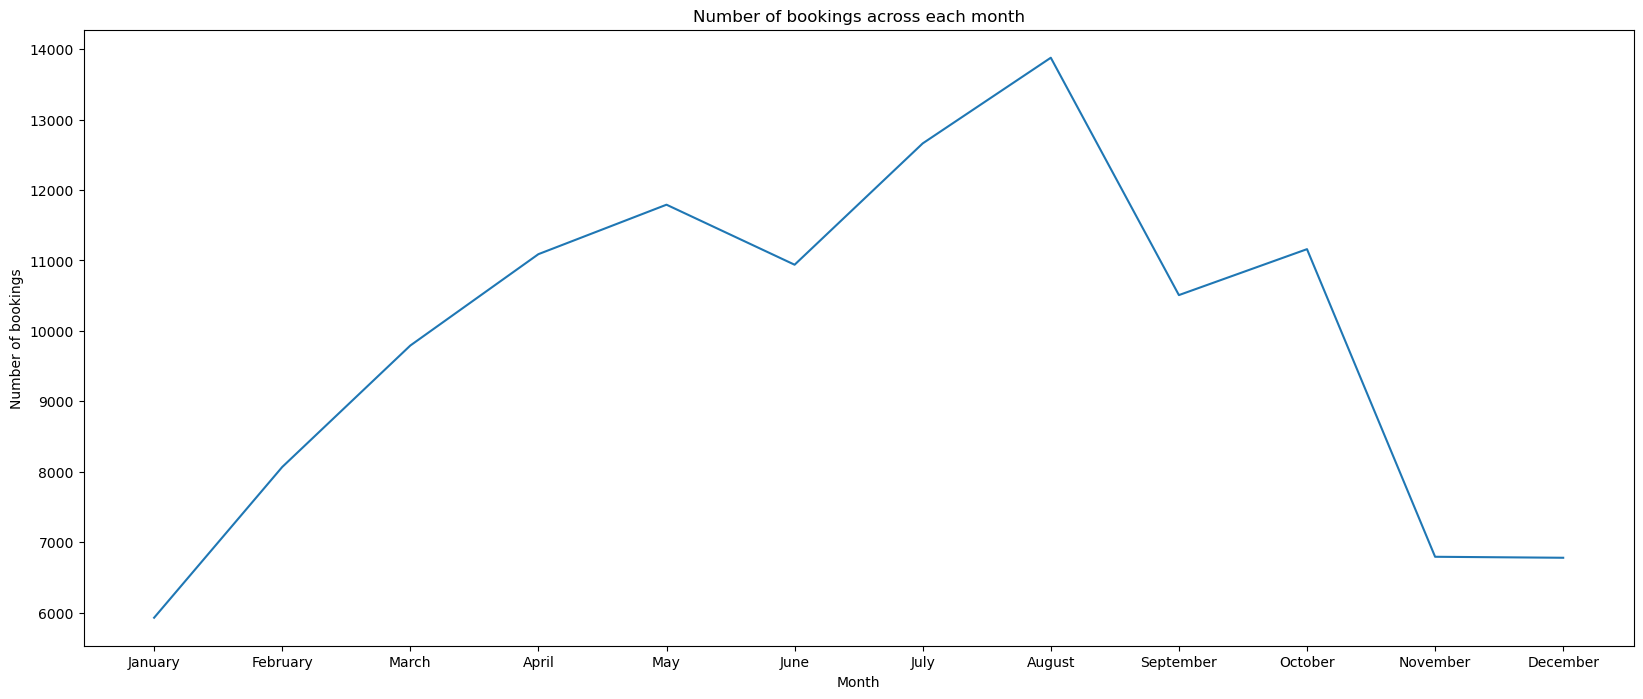

In [43]:
#In which month most bookings happened?

# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=hotel_df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

<Axes: title={'center': 'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

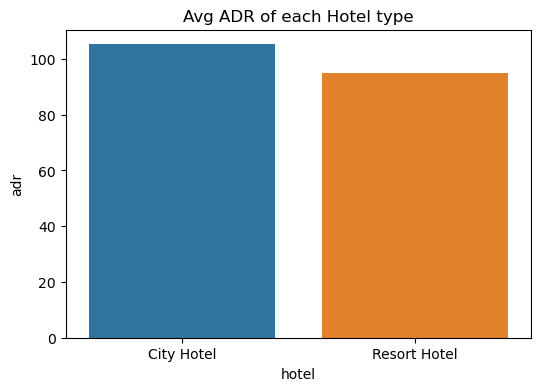

In [44]:
#BIVARIATE AND MULTIVARIATE ANALYSIS

#Which hotel type has the highest ADR

#grouping by hotel adr
grup_by_hotel=hotel_df.groupby('hotel')

highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(6,4))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

#City Hotel has the highest ADR that means city hotels are generating more revenue than resort hotels

Text(0.5, 1.0, 'Percentage of booking cancellation')

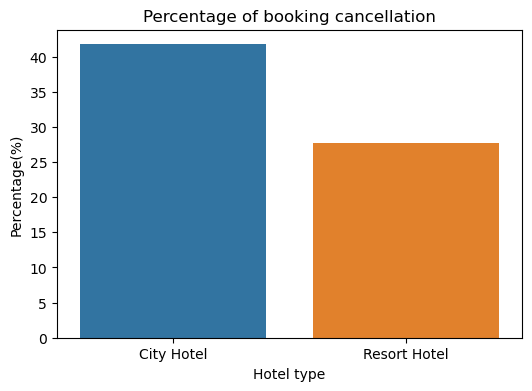

In [45]:
#Which hotel has the highest cancellation rate


# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=hotel_df[hotel_df['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=hotel_df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(6,4))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

#Percentage of booking cancellation is high in City hotel

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

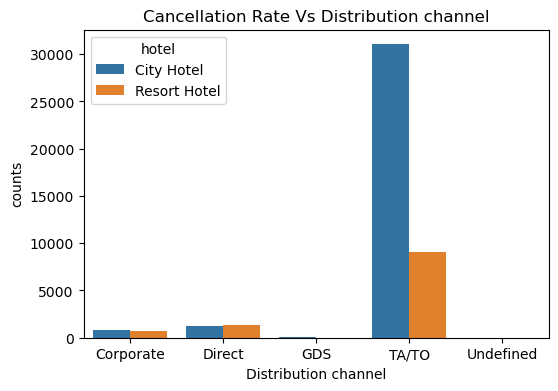

In [46]:
#Which distribution channel has the highest cancellation rate

canceled_df=hotel_df[hotel_df['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(6,4))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')



# Data Distribution graphs

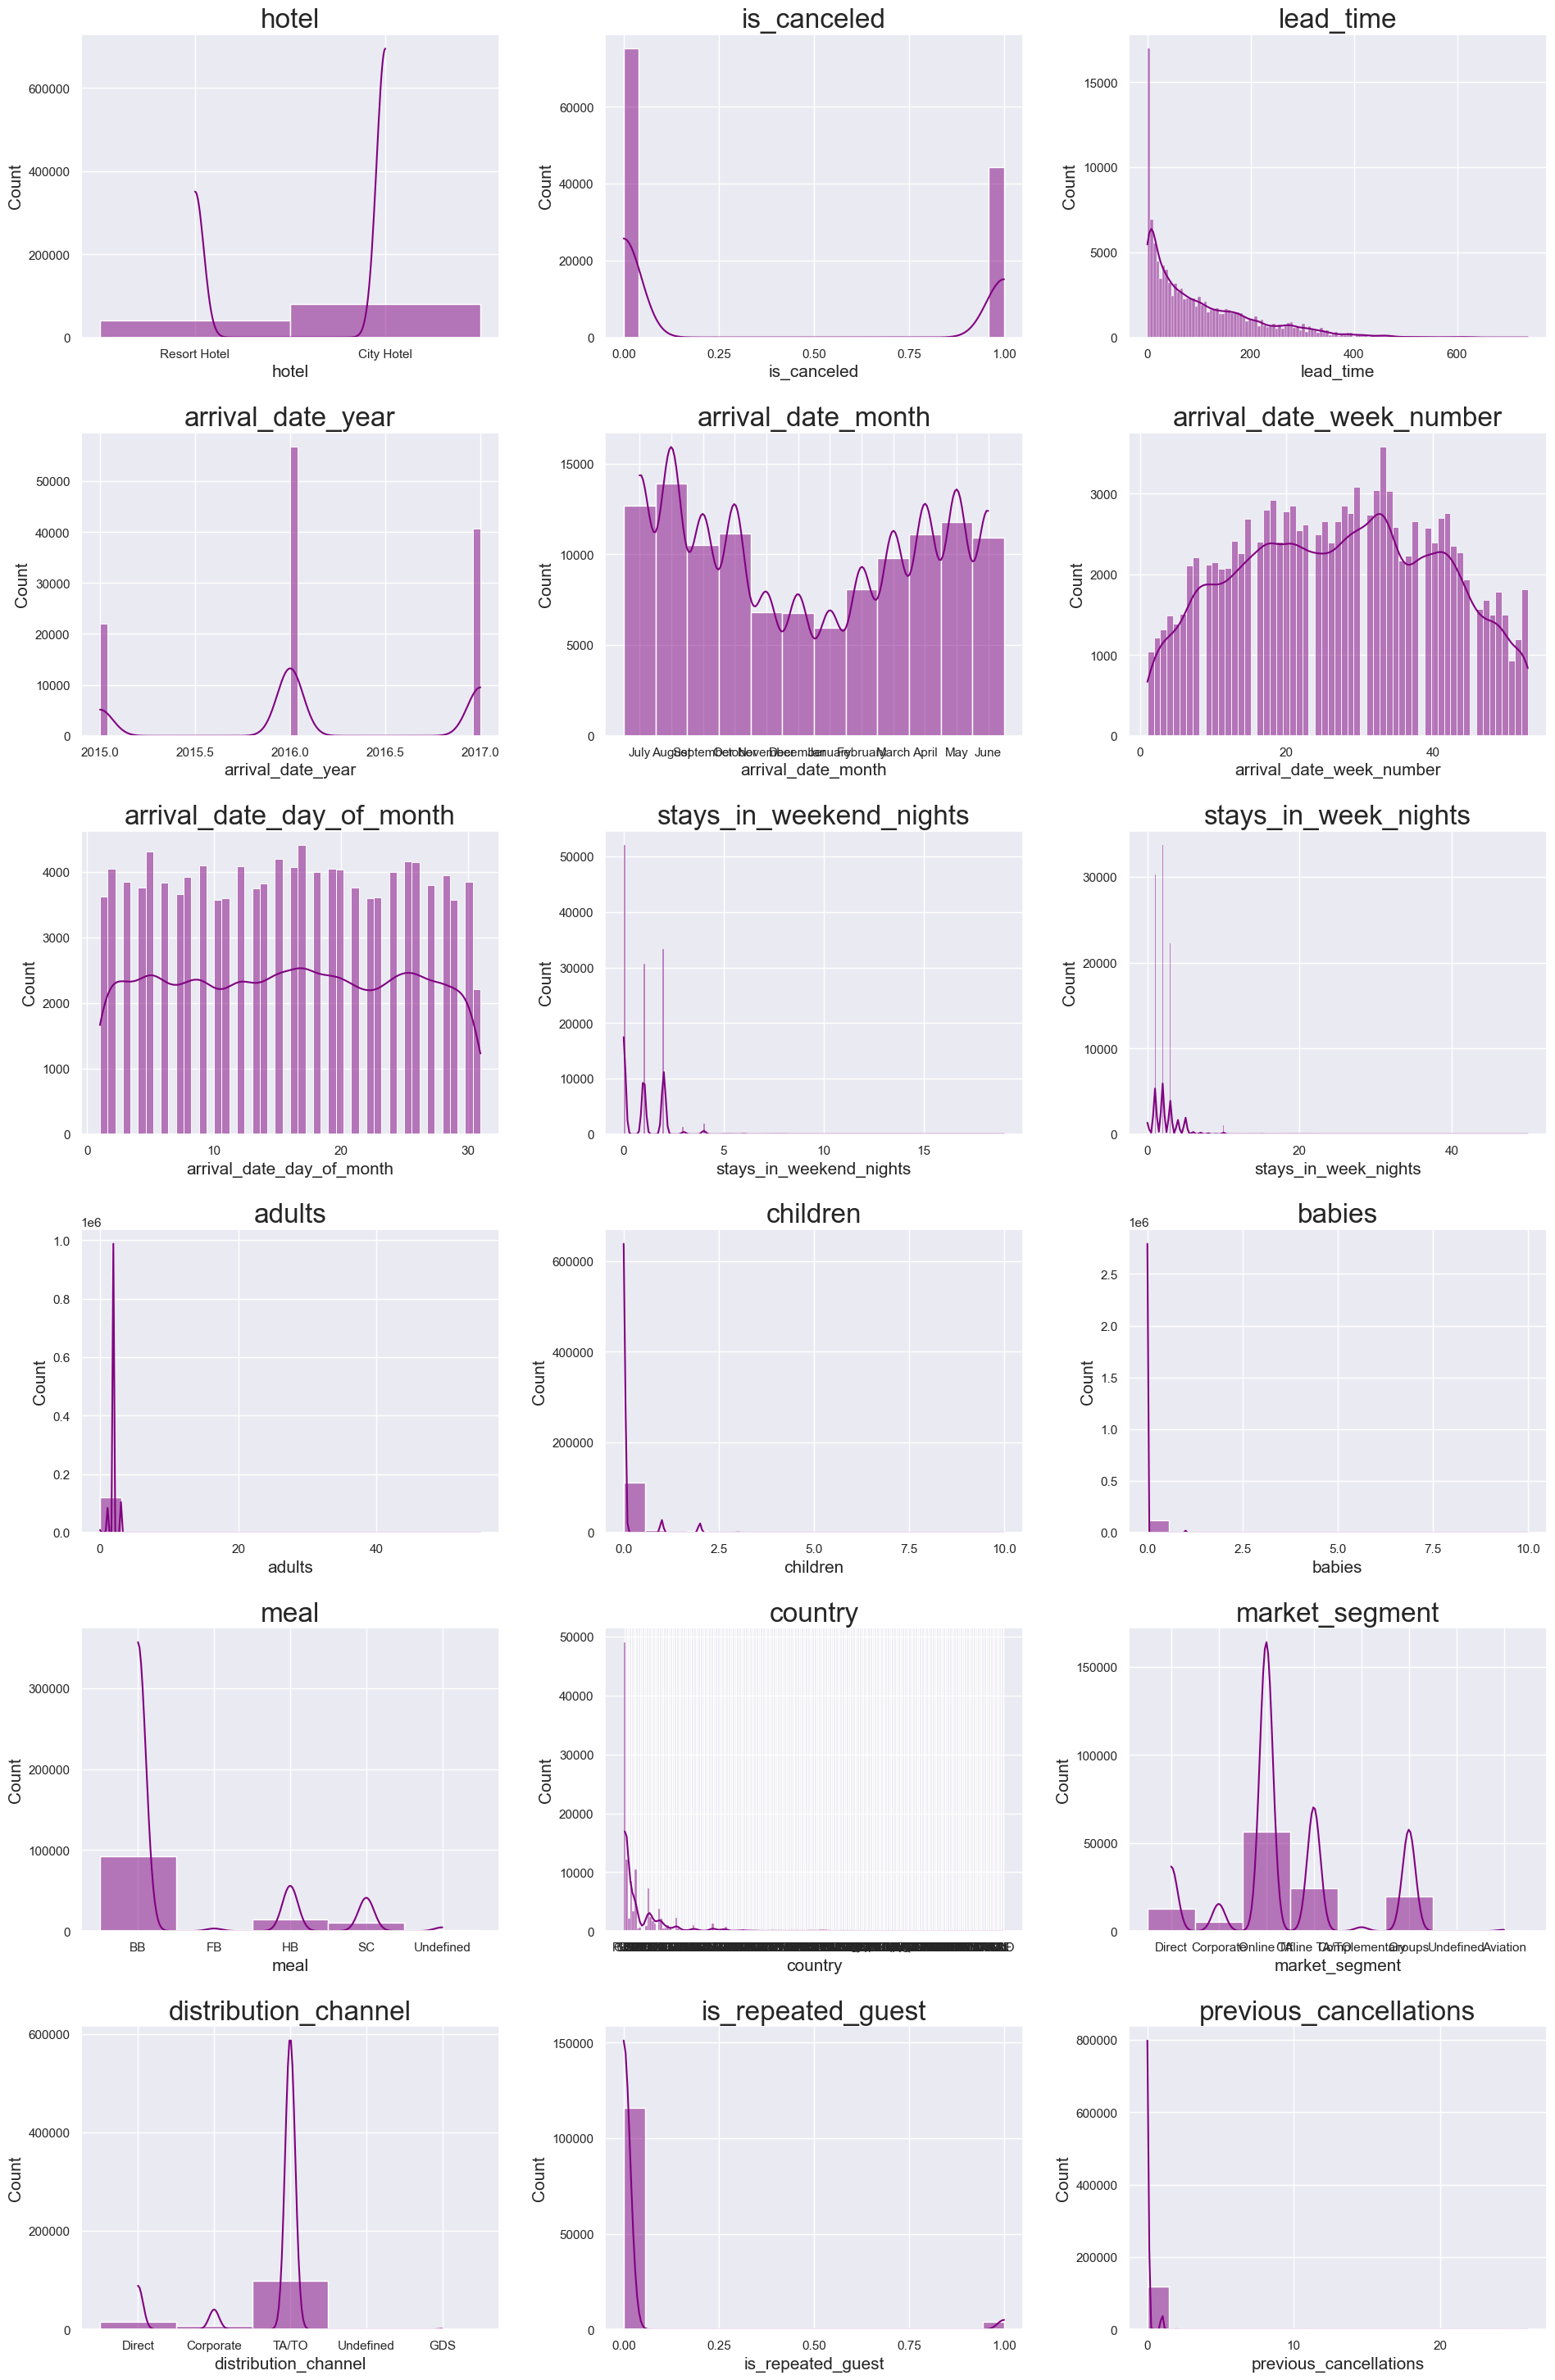

In [47]:
sns.set(rc={
            "font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f,ax in zip(hotel_df,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=hotel_df,x=hotel_df[f],kde=True,color='purple')
    ax.set_title(f)

# EDA on feature ‘is_canceled’

In [48]:
#Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form
df_le = hotel_df.copy()
le = LabelEncoder()
categoricals = [
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
]
for col in categoricals:
    df_le[col] = le.fit_transform(df_le[col])
    
plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f');


ValueError: could not convert string to float: 'Resort Hotel'

<Figure size 2000x1500 with 0 Axes>

# Data Preprocessing and Feature Engineering

## Numerical and categorical Features


In [49]:
# numerical and categoriacl columns(features)
numeric_cols = hotel_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = hotel_df.select_dtypes('object').columns.tolist()

# numerical features
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)

Total numeric columns are: 20
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_people', 'total_stay']


In [50]:
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 12
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


There are total 19 Numeric columns, and 12 categorical columns.

Babies, adults, and children can not be zero at the same time, so we will drop all the observations having zero at the same time.

In [51]:
filter = (hotel_df.children == 0) & (hotel_df.adults == 0) & (hotel_df.babies == 0)
hotel_df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  deposit_type  days_in_waiting_list  \
2224                       3       0  ...    No Deposit                     0   
2409                       0       0  ...    No Deposit                     0   
3181                       2       0  ...    No Deposit                     0   
3684                       4       0  ...    No Deposit                   122   
3708                       4       0  ...    No Deposit                   122   
...                      ...     ...  ...           ...                   ...   
115029                     3       0  ...    No Deposit                     0   
115091                     1       0  ...    No Deposit                     0   
116251                     1       0  ...    No Deposit                     0   
116534                     5       0  ...    No Deposit                     0   
117087                     2       0  ...    No Deposit                     0   

          customer_type     adr required_car_parking_spaces  \
2224    Transient-Party    0.00                           0   
2409          Transient    0.00                           0   
3181    Transient-Party    0.00                           0   
3684    Transient-Party    0.00                           0   
3708    Transient-Party    0.00                           0   
...                 ...     ...                         ...   
115029        Transient  100.80                           0   
115091        Transient    0.00                           1   
116251        Transient   73.80                           0   
116534  Transient-Party   22.86                           0   
117087        Transient    0.00                           0   

       total_of_special_requests  reservation_status  reservation_status_d

In [52]:
hotel_df = hotel_df[~filter]
hotel_df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  days_in_waiting_list  \
0                          0       2  ...    No Deposit                     0   
1                          0       2  ...    No Deposit                     0   
2                          1       1  ...    No Deposit                     0   
3                          1       1  ...    No Deposit                     0   
4                          2       2  ...    No Deposit                     0   
...                      ...     ...  ...           ...                   ...   
119385                     5       2  ...    No Deposit                     0   
119386                     5       3  ...    No Deposit                     0   
119387                     5       2  ...    No Deposit                     0   
119388                     5       2  ...    No Deposit                     0   
119389                     7       2  ...    No Deposit                     0   

       customer_type     adr required_car_parking_spaces  \
0          Transient    0.00                           0   
1          Transient    0.00                           0   
2          Transient   75.00                           0   
3          Transient   75.00                           0   
4          Transient   98.00                           0   
...              ...     ...                         ...   
119385     Transient   96.14                           0   
119386     Transient  225.43                           0   
119387     Transient  157.71                           0   
119388     Transient  104.40                           0   
119389     Transient  151.20                           0   

       total_of_special_requests  reservation_status  reservation_status_date  \
0                            

In [53]:
guest_city = hotel_df[hotel_df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

Country  No of guests
0       PRT         21398
1       GBR          9667
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
160     BHR             1
161     DJI             1
162     MLI             1
163     NPL             1
164     FRO             1

[165 rows x 2 columns]

## Visulaizing this on map

In [54]:
import folium
from folium.plugins import HeatMap
import plotly.express as px
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

In [55]:
data_resort = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
data_city = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.081521
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

### We see that all the months are not listed in the proper order so first we need to sort them according to their proper order for our model to function properly

In [56]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd
def sort_month(hotel_df, column_name):
    return sd.Sort_Dataframeby_Month(hotel_df, column_name)
final_prices = sort_month(hotel_df, 'arrival_date_month')
final_prices

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        109               2016   
1       Resort Hotel            0        109               2016   
2       Resort Hotel            1          2               2016   
3       Resort Hotel            0         88               2016   
4       Resort Hotel            1         20               2016   
...              ...          ...        ...                ...   
119203    City Hotel            0        173               2016   
119204    City Hotel            0         17               2016   
119205    City Hotel            0        107               2016   
119206    City Hotel            0        310               2016   
119207    City Hotel            0        310               2016   

       arrival_date_month  arrival_date_week_number  \
0                 January                         1   
1                 January                         1   
2                 January                         1   
3                 January                         1   
4                 January                         1   
...                   ...                       ...   
119203           December                        53   
119204           December                        53   
119205           December                        53   
119206           December                        53   
119207           December                        53   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119203                         26                        3   
119204                         30                        2   
119205                         31                        2   
119206                         27                        2   
119207                         27                        2   

        stays_in_week_nights  adults  ...  deposit_type  days_in_waiting_list  \
0                          1       2  ...    No Deposit                     0   
1                          1       2  ...    No Deposit                     0   
2                          1       2  ...    No Deposit                     0   
3                          2       2  ...    No Deposit                     0   
4                          2       2  ...    No Deposit                     0   
...                      ...     ...  ...           ...                   ...   
119203                     8       2  ...    No Deposit                     0   
119204                     5       2  ...    No Deposit                     0   
119205                     5       2  ...    No Deposit                     0   
119206                    10       2  ...    No Deposit                     0   
119207                    10       2  ...    No Deposit                     0   

          customer_type     adr required_car_parking_spaces  \
0       Transient-Party   59.94                           0   
1       Transient-Party  116.10                           1   
2             Transient   89.00                           0   
3             Transient   73.46                           0   
4             Transient  119.00                           0   
...                 ...     ...                         ...   
119203        Transient  117.82                           0   
119204        Transient   90.34                           0   
119205        Transient  103.57                           0   
119206  Transient-Party   68.57                           0   
119207  Transient-Party   68.57                           0   

       total_of_special_requests  reservation_status  reservation_status_d

In [57]:
final_prices.columns[:-1]

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people'],
      dtype='object')

In [58]:
final_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119208 entries, 0 to 119207
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119208 non-null  object 
 1   is_canceled                     119208 non-null  int64  
 2   lead_time                       119208 non-null  int64  
 3   arrival_date_year               119208 non-null  int64  
 4   arrival_date_month              119208 non-null  object 
 5   arrival_date_week_number        119208 non-null  int64  
 6   arrival_date_day_of_month       119208 non-null  int64  
 7   stays_in_weekend_nights         119208 non-null  int64  
 8   stays_in_week_nights            119208 non-null  int64  
 9   adults                          119208 non-null  int64  
 10  children                        119208 non-null  float64
 11  babies                          119208 non-null  int64  
 12  meal            

# Encoding categorical variables

In [59]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'market_segment', 'distribution_channel', 'reservation_status_date',
      'deposit_type','reserved_room_type']
for item in var:
    df_le[item] = lb.fit_transform(df_le[item])

In [60]:
data = pd.get_dummies(df_le, columns=['hotel', 'customer_type', 'market_segment', 'distribution_channel'])

In [61]:
df_le

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           1            0        342               2015                   5   
1           1            0        737               2015                   5   
2           1            0          7               2015                   5   
3           1            0         13               2015                   5   
4           1            0         14               2015                   5   
...       ...          ...        ...                ...                 ...   
119385      0            0         23               2017                   1   
119386      0            0        102               2017                   1   
119387      0            0         34               2017                   1   
119388      0            0        109               2017                   1   
119389      0            0        205               2017                   1   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                             0                     0       2  ...   
1                             0                     0       2  ...   
2                             0                     1       1  ...   
3                             0                     1       1  ...   
4                             0                     2       2  ...   
...                         ...                   ...     ...  ...   
119385                        2                     5       2  ...   
119386                        2                     5       3  ...   
119387                        2                     5       2  ...   
119388                        2                     5       2  ...   
119389                        2                     7       2  ...   

        deposit_type  days_in_waiting_list  customer_type     adr  \
0                  0                     0              2    0.00   
1                  0                     0              2    0.00   
2                  0                     0              2   75.00   
3                  0                     0              2   75.00   
4                  0                     0              2   98.00   
...              ...                   ...            ...     ...   
119385             0                     0              2   96.14   
119386             0                     0              2  225.43   
119387             0                     0              2  157.71   
119388             0                     0              2  104.40   
119389             0                     0              2  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          1   
...                             ...                        ...   
119385                            0                          0   
119386                            0                          2   
119387                    

In [62]:
# since we have columns that that's have almost similar value like children babies, now is combined into total_people
# stays in weekend nights and stays in week nights now combined into total stays. So, we will be dropping both columns.
# Furthermore, in the above matrix, there appears to be a negative high correlation between reservation_status 
# and is_canceled features. 
# also dropping the reservation_status_date column because it is related to the reservation_status column.

df_le = df_le.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children',
                              'days_in_waiting_list',  'arrival_date_year', 'assigned_room_type',
                              'days_in_waiting_list','meal','reserved_room_type',
                              'arrival_date_year', 'reservation_status' ,'reservation_status_date' ])
df_le = df_le.reset_index(drop = True)
df_le.head()


hotel  is_canceled  lead_time  arrival_date_month  \
0      1            0        342                   5   
1      1            0        737                   5   
2      1            0          7                   5   
3      1            0         13                   5   
4      1            0         14                   5   

   arrival_date_week_number  arrival_date_day_of_month  adults  country  \
0                        27                          1       2      135   
1                        27                          1       2      135   
2                        27                          1       1       59   
3                        27                          1       1       59   
4                        27                          1       2       59   

   market_segment  distribution_channel  ...  previous_cancellations  \
0               3                     1  ...                       0   
1               3                     1  ...                       0   
2               3                     1  ...                       0   
3               2                     0  ...                       0   
4               6                     3  ...                       0   

   previous_bookings_not_canceled  booking_changes  deposit_type  \
0                               0                3             0   
1                               0                4             0   
2                               0                0             0   
3                               0                0             0   
4                               0                0             0   

   customer_type   adr  required_car_parking_spaces  \
0              2   0.0                            0   
1              2   0.0                            0   
2              2  75.0                            0   
3              2  75.0                            0   
4              2  98.0                            0   

   total_of_special_requests  total_people  total_stay  
0                          0           2.0           0  
1                          0           2.0           0  
2                          0           1.0           1  
3                          0           1.0           1  
4                          1           2.0           2  

[5 rows x 21 columns]

In [63]:
clean_data_scal = df_le.drop('is_canceled', axis = 1)

robust = RobustScaler()
robust.fit(clean_data_scal)
scaled_df = robust.transform(clean_data_scal)
scaled_df = pd.DataFrame(scaled_df, columns = clean_data_scal.columns)
scaled_df.head()

hotel  lead_time  arrival_date_month  arrival_date_week_number  \
0    1.0   1.922535           -0.166667                 -0.045455   
1    1.0   4.704225           -0.166667                 -0.045455   
2    1.0  -0.436620           -0.166667                 -0.045455   
3    1.0  -0.394366           -0.166667                 -0.045455   
4    1.0  -0.387324           -0.166667                 -0.045455   

   arrival_date_day_of_month  adults   country  market_segment  \
0                       -1.0     0.0  0.683544            -1.0   
1                       -1.0     0.0  0.683544            -1.0   
2                       -1.0    -1.0 -0.278481            -1.0   
3                       -1.0    -1.0 -0.278481            -1.5   
4                       -1.0     0.0 -0.278481             0.5   

   distribution_channel  is_repeated_guest  previous_cancellations  \
0                  -2.0                0.0                     0.0   
1                  -2.0                0.0                     0.0   
2                  -2.0                0.0                     0.0   
3                  -3.0                0.0                     0.0   
4                   0.0                0.0                     0.0   

   previous_bookings_not_canceled  booking_changes  deposit_type  \
0                             0.0              3.0           0.0   
1                             0.0              4.0           0.0   
2                             0.0              0.0           0.0   
3                             0.0              0.0           0.0   
4                             0.0              0.0           0.0   

   customer_type       adr  required_car_parking_spaces  \
0            0.0 -1.667695                          0.0   
1            0.0 -1.667695                          0.0   
2            0.0 -0.345177                          0.0   
3            0.0 -0.345177                          0.0   
4            0.0  0.060395                          0.0   

   total_of_special_requests  total_people  total_stay  
0                        0.0           0.0        -1.5  
1                        0.0           0.0        -1.5  
2                        0.0          -1.0        -1.0  
3                        0.0          -1.0        -1.0  
4                        1.0           0.0        -0.5

In [64]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119388 entries, 0 to 119387
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119388 non-null  float64
 1   lead_time                       119388 non-null  float64
 2   arrival_date_month              119388 non-null  float64
 3   arrival_date_week_number        119388 non-null  float64
 4   arrival_date_day_of_month       119388 non-null  float64
 5   adults                          119388 non-null  float64
 6   country                         119388 non-null  float64
 7   market_segment                  119388 non-null  float64
 8   distribution_channel            119388 non-null  float64
 9   is_repeated_guest               119388 non-null  float64
 10  previous_cancellations          119388 non-null  float64
 11  previous_bookings_not_canceled  119388 non-null  float64
 12  booking_changes 

In [65]:
scaled_df['is_canceled'] = df_le['is_canceled']

In [66]:
scaled_df.isna().sum()

hotel                             0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
total_people                      0
total_stay                        0
is_canceled                       0
dtype: int64

In [67]:
# Separate features and predicted value
x_feat = scaled_df.drop('is_canceled', axis = 1)
y_feat = scaled_df['is_canceled']

[0.01568326 0.1362948  0.03594987 0.05945023 0.07059982 0.01354817
 0.12567133 0.0536631  0.02175339 0.00543463 0.02778056 0.00232995
 0.02456052 0.1233298  0.03213255 0.08779082 0.0242811  0.0621071
 0.01870102 0.05893799]


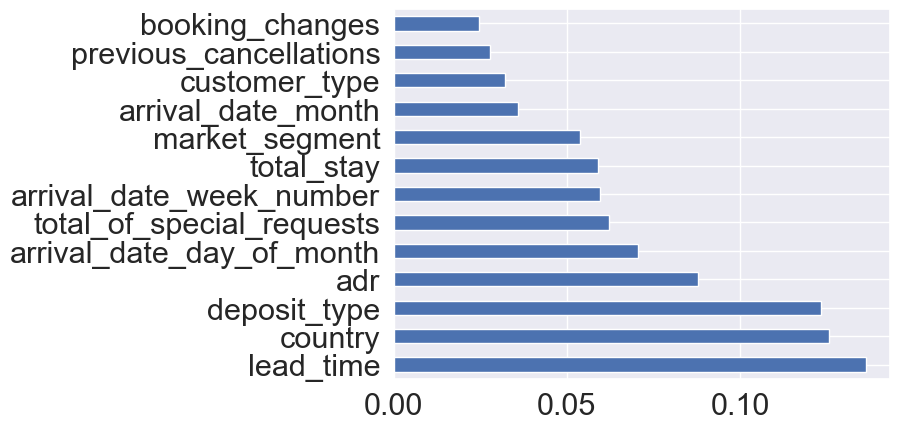

In [68]:
# perform feature selection using Feature Importance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
model = ExtraTreesClassifier()
model.fit(x_feat, y_feat)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = x_feat.columns)
feat_importances.nlargest(13).plot.barh()
plt.show()

In [69]:
# Perform feature selection based on feature importance above

X = scaled_df[['country', 
        'deposit_type', 
        'lead_time', 
        'total_of_special_requests', 
        'adr', 'deposit_type',
        'market_segment', 'total_stay',
        'arrival_date_day_of_month', 
        'arrival_date_week_number', 
     'arrival_date_month','booking_changes','previous_cancellations',
               'customer_type'
       ]]

y = scaled_df['is_canceled'] 

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119388 entries, 0 to 119387
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   country                    119388 non-null  float64
 1   deposit_type               119388 non-null  float64
 2   lead_time                  119388 non-null  float64
 3   total_of_special_requests  119388 non-null  float64
 4   adr                        119388 non-null  float64
 5   deposit_type               119388 non-null  float64
 6   market_segment             119388 non-null  float64
 7   total_stay                 119388 non-null  float64
 8   arrival_date_day_of_month  119388 non-null  float64
 9   arrival_date_week_number   119388 non-null  float64
 10  arrival_date_month         119388 non-null  float64
 11  booking_changes            119388 non-null  float64
 12  previous_cancellations     119388 non-null  float64
 13  customer_type              11

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [72]:
X_train.shape

(83571, 14)

In [73]:
num_columns = df_le.select_dtypes(include='number')
num_columns

hotel  is_canceled  lead_time  arrival_date_month  \
0           1            0        342                   5   
1           1            0        737                   5   
2           1            0          7                   5   
3           1            0         13                   5   
4           1            0         14                   5   
...       ...          ...        ...                 ...   
119383      0            0         23                   1   
119384      0            0        102                   1   
119385      0            0         34                   1   
119386      0            0        109                   1   
119387      0            0        205                   1   

        arrival_date_week_number  arrival_date_day_of_month  adults  country  \
0                             27                          1       2      135   
1                             27                          1       2      135   
2                             27                          1       1       59   
3                             27                          1       1       59   
4                             27                          1       2       59   
...                          ...                        ...     ...      ...   
119383                        35                         30       2       15   
119384                        35                         31       3       56   
119385                        35                         31       2       43   
119386                        35                         31       2       59   
119387                        35                         29       2       43   

        market_segment  distribution_channel  ...  previous_cancellations  \
0                    3                     1  ...                       0   
1                    3                     1  ...                       0   
2                    3                     1  ...                       0   
3                    2                     0  ...                       0   
4                    6                     3  ...                       0   
...                ...                   ...  ...                     ...   
119383               5                     3  ...                       0   
119384               6                     3  ...                       0   
119385               6                     3  ...                       0   
119386               6                     3  ...                       0   
119387               6                     3  ...                       0   

        previous_bookings_not_canceled  booking_changes  deposit_type  \
0                                    0                3             0   
1                                    0                4             0   
2                                    0                0             0   
3                                    0                0             0   
4                                    0                0             0   
...                                ...              ...           ...   
119383                               0                0             0   
119384                               0                0             0   
119385                               0                0             0   
119386                               0                0             0   
119387                               0                0             0   

        customer_type     adr  required_car_parking_spaces  \
0                   2    0.00                            0   
1                   2    0.00                            0   
2                   2   75.00                            0   
3                   2   75.00                            0   
4                   2   98.00                            0   
...               ...     ...                          ...   
119383              2   96.14                            0   
119384          

# DECISION TREE

In [74]:
pipe_DT = Pipeline([
    ("algo", DecisionTreeClassifier())
])

In [75]:
param_DT = {
    'algo__min_samples_split': [2,1,3,4,6,8,10,],
    'algo__max_depth': [None,1,2,4,8,10,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,5,8]
}

model_DT = GridSearchCV(estimator=pipe_DT, param_grid=param_DT, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_DT.fit(X_train, y_train)


#Grid Search uses a different combination of all the specified hyperparameters 
#and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

#After tuning the model,using the 'fit' method trains the algorithm on the training data


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 1, 2, 4, 8, 10, 12, 14, 18,
                                             20],
                         'algo__min_samples_leaf': [1, 2, 4, 5, 8],
                         'algo__min_samples_split': [2, 1, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [78]:
#best_estimator_estimator - Estimator that was chosen by the search, i.e. estimator which gave
#highest score (or smallest loss if specified) on the left out data. 

DT_tuned = model_DT.best_estimator_
DT_tuned_train = model_DT.best_score_
y_pred_DT_tuned = DT_tuned.predict(X_test) 

In [79]:
recall_DT_tuned = recall_score(y_test, y_pred_DT_tuned)
acc_DT_tuned = accuracy_score(y_test, y_pred_DT_tuned)
precision_DT_tuned = precision_score(y_test, y_pred_DT_tuned)
f1_DT_tuned = f1_score(y_test, y_pred_DT_tuned)
acc_DT_tuned_train = DT_tuned_train

print(f"Training Accuracy : {acc_DT_tuned_train}")
print(f"Testing Accuracy : {acc_DT_tuned}")

Training Accuracy : 0.8331239305500713
Testing Accuracy : 0.8346315995197812


In [80]:
print(classification_report(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     22455
           1       0.80      0.74      0.77     13362

    accuracy                           0.83     35817
   macro avg       0.83      0.82      0.82     35817
weighted avg       0.83      0.83      0.83     35817



# KNN ALGO

In [81]:
pipe_KNN = Pipeline([
    ('algo', KNeighborsClassifier())
])

In [82]:
param_KNN = {
    'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
    'algo__weights':['uniform', 'distance'],
    'algo__p':[2,1]
}

model_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_KNN, cv = 3, n_jobs = -1, verbose = 1)
model_KNN.fit(X_train, y_train)

#Grid Search uses a different combination of all the specified hyperparameters 
#and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

#After tuning the model,using the 'fit' method trains the algorithm on the training data

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
                         'algo__p': [2, 1],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [83]:
#best_estimator_estimator - Estimator that was chosen by the search, i.e. estimator which gave
#highest score (or smallest loss if specified) on the left out data. 
KNN_tuned = model_KNN.best_estimator_
KNN_tuned_train = model_KNN.best_score_
y_pred_KNN_tuned = KNN_tuned.predict(X_test) 

In [ ]:
pipe_KNN.get_params()

In [ ]:
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
f1_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned_train = KNN_tuned_train

print(f"Training Accuracy : {acc_KNN_tuned_train}")
print(f"Testing Accuracy : {acc_KNN_tuned}")


# KNN has a better accuracy score compared to Decision Tree algorithm 
